In [1]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.ndimage.interpolation import shift
from sklearn.metrics import r2_score as reg_acc
from sklearn.metrics import mean_squared_error as mse
from sklearn.neural_network import MLPRegressor as NN
from statsmodels.tsa.arima_model import ARIMA
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.preprocessing import MinMaxScaler
from keras import optimizers
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
features=pd.read_csv('gdrive/My Drive/DS Project/Dataset/Dataset 2/features.csv')

In [0]:
stores=pd.read_csv('gdrive/My Drive/DS Project/Dataset/Dataset 2/stores.csv')

In [0]:
train=pd.read_csv('gdrive/My Drive/DS Project/Dataset/Dataset 2/train.csv')

In [0]:
merged_1=train.merge(stores, on=['Store'], how='left')

In [0]:
train=merged_1.merge(features, on=['Store','Date','IsHoliday'], how='left')

In [0]:
nan_values=train.isnull()
nan_values_count=[0]*train.shape[1]
for i in range(train.shape[1]):
  nan_values_count[i]=sum(nan_values.iloc[:,i])

In [0]:
train['MarkDown1']=train['MarkDown1'].fillna(0)
train['MarkDown2']=train['MarkDown2'].fillna(0)
train['MarkDown3']=train['MarkDown3'].fillna(0)
train['MarkDown4']=train['MarkDown4'].fillna(0)
train['MarkDown5']=train['MarkDown5'].fillna(0)

In [0]:
train['month']=pd.DatetimeIndex(train['Date']).month
train['day']=pd.DatetimeIndex(train['Date']).day
train['Type']=train['Type'].astype('category')
train['StoreType']=train['Type'].cat.codes
train=train.drop('Type',axis=1)
train['date']=train['Date']
train=train.drop('Date',axis=1)

In [0]:
test=pd.read_csv('gdrive/My Drive/DS Project/Dataset/Dataset 2/test.csv')

In [0]:
merged_1=test.merge(stores, on=['Store'], how='left')
test=merged_1.merge(features, on=['Store','Date','IsHoliday'], how='left')
nan_values=test.isnull()
nan_values_count=[0]*test.shape[1]
for i in range(test.shape[1]):
  nan_values_count[i]=sum(nan_values.iloc[:,i])
test['MarkDown1']=test['MarkDown1'].fillna(0)
test['MarkDown2']=test['MarkDown2'].fillna(0)
test['MarkDown3']=test['MarkDown3'].fillna(0)
test['MarkDown4']=test['MarkDown4'].fillna(0)
test['MarkDown5']=test['MarkDown5'].fillna(0)
test['CPI']=test['CPI'].fillna(np.mean(test['CPI']))
test['Unemployment']=test['Unemployment'].fillna(np.mean(test['Unemployment']))
test['month']=pd.DatetimeIndex(test['Date']).month
test['day']=pd.DatetimeIndex(test['Date']).day
test['Type']=test['Type'].astype('category')
test['StoreType']=test['Type'].cat.codes
test=test.drop('Type',axis=1)
test['date']=test['Date']
test=test.drop('Date',axis=1)

In [0]:
train['sales']=train['Weekly_Sales']
train=train.drop('Weekly_Sales',axis=1)

In [14]:
print(train.shape)
print(test.shape)

(421570, 18)
(115064, 17)


In [0]:
time_outputs=100
time_stamps=100

In [0]:
date=train['date']

train=train.drop('date',axis=1)

In [0]:
train=train.iloc[np.where(np.array(train['Store']==4))]
train=train['sales']

In [0]:
train=train.as_matrix()

In [0]:
#train=np.log(train)

In [0]:
indices=[]
for i in range(train.shape[0]):
  if train[i]==0:
    indices.append(i)

In [21]:
indices

[]

In [0]:
#x=np.arange(train.shape[0])
#train=np.sin(x/10)

In [23]:
train.shape

(10272,)

In [0]:
def series_to_supervised(data,time_stamps=30):
  count=data.shape[0]-time_stamps-1
  X=np.zeros((count,time_stamps))
  Y=np.zeros((count,time_outputs))
  print(count)
  for i in range(count):
    X[i,:]=data[i:time_stamps+i]
    Y[i,:]=data[i+1:time_stamps+i+1]
    
  train_x=X[: int(0.8*X.shape[0])]
  train_y=Y[: int(0.8*Y.shape[0])]
  test_x=X[int(0.8*X.shape[0]) :]
  test_y=Y[int(0.8*Y.shape[0]) :]
  
  return train_x,train_y,test_x,test_y

In [25]:
train_x,train_y,test_x,test_y=series_to_supervised(train,time_stamps=time_stamps)

10171


In [26]:
test_x.shape

(2035, 100)

In [0]:
scaler= np.max(train_x)

In [0]:
train_x=train_x/scaler
test_x=test_x/scaler
train_y=train_y/scaler
test_y=test_y/scaler

In [0]:
train_x=train_x.reshape(-1,time_stamps,1)
test_x=test_x.reshape(-1,time_stamps,1)
train_y=train_y.reshape(-1,time_outputs)
test_y=test_y.reshape(-1,time_outputs)

In [0]:
model = Sequential()
model.add(LSTM(time_stamps,activation='tanh',return_sequences=True,input_shape=(train_x.shape[1], train_x.shape[2])))
#model.add(Dropout(0.2))
#model.add(Dropout(0.2))
#model.add(LSTM(100,activation='tanh',return_sequences=True))
#model.add(LSTM(100,activation='tanh',return_sequences=True))
#model.add(LSTM(100,activation='tanh',return_sequences=True))
model.add(LSTM(time_stamps,activation='tanh'))

#model.add(Dropout(0.2))
#model.add(Dropout(0.2))
#model.add(LSTM(256,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(32,activation='relu'))
model.add(Dense(time_outputs,activation='sigmoid'))
#adam=optimizers.adam(lr=0.0001)
model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
model.fit(train_x, train_y, epochs=100, batch_size=10, validation_data=(test_x, test_y), shuffle=False)

Train on 8136 samples, validate on 2035 samples
Epoch 1/100
8136/8136 [==============================] - 418s 51ms/step - loss: 0.0066 - val_loss: 0.0181
Epoch 2/100
8136/8136 [==============================] - 414s 51ms/step - loss: 0.0048 - val_loss: 0.0181
Epoch 3/100
8136/8136 [==============================] - 415s 51ms/step - loss: 0.0048 - val_loss: 0.0180
Epoch 4/100
 820/8136 [==>...........................] - ETA: 5:39 - loss: 0.0095

KeyboardInterrupt: ignored

In [32]:
prev=train_x[-1,:]
prev=prev.reshape(1,-1,1)
prediction=[]
for i in range(test_x.shape[0]):
  if i%100==0:
    print(i)
  out=model.predict(prev)
  #prev=np.squeeze(prev)
  #for j in range(time_outputs):
  #  prev=shift(prev, -1, cval=out[0,j])
  #print(out.shape)
  prediction.append(out[0,-1])
  prev[0,:,0]=out[:,:]
  prev=prev.reshape(1,-1,1)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


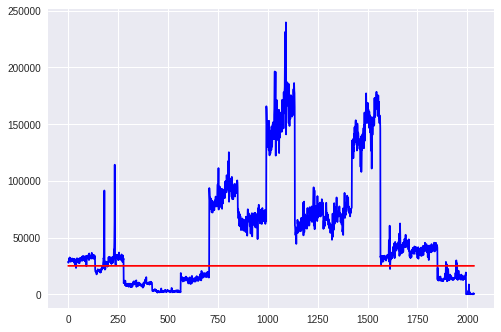

In [33]:
#prediction=prediction.reshape(-1)
#prediction=prediction[:2000]
#test_y=test_y[:2000]
y=test_y[:,-1]
indices=np.arange(test_y.shape[0])
y=y.reshape(-1)
plt.plot(indices,y*scaler,'b',indices,np.array(prediction)*scaler,'r')

In [34]:
np.sqrt(mse(y*scaler,np.array(prediction)*scaler))

56327.731391618916